In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# Conditions aux limites absorbantes 1D

In [4]:
# PML 1D

In [5]:
## Parameter

In [6]:
delta_t = 0.01
delta_x = 0.01
nt = 200

L_corp_domain = 10
L_PML         = 5
L_after_PML   = 10


rho = 1
muy = 1
si  = 1

# simulation field
x = np.arange(-10,15,0.01)

ind_start_PML = int(10/delta_x)
ind_end_PML   = int(15/delta_x)

# Corp domain : -10 ---> 0
# PML domain:    0  ---> 5
# Test after PML: 5 ---> 15


nx= x.shape[0]
# nx = int((L_corp_domain + L_absorb + L_after_absorb)/delta_x)


In [7]:
c = 1
# v0 = np.arange(nx) * (np.arange(nx) - nx + 1) / nx ** 2
# v0 = np.zeros(nx)
# v0[1:] = (U0[1:]-U0[:-1])/
# v0[0] = 0
# v0[-1] = 0

In [8]:
# Couche d'absorption

m       = 1
sigma0  = 1
sigma_x = np.zeros(nx)
temp    = np.multiply(x[ind_start_PML:ind_end_PML],x[ind_start_PML:ind_end_PML]-1)**m
temp[temp<0] = 0

In [9]:
sigma_x[ind_start_PML:ind_end_PML] = temp

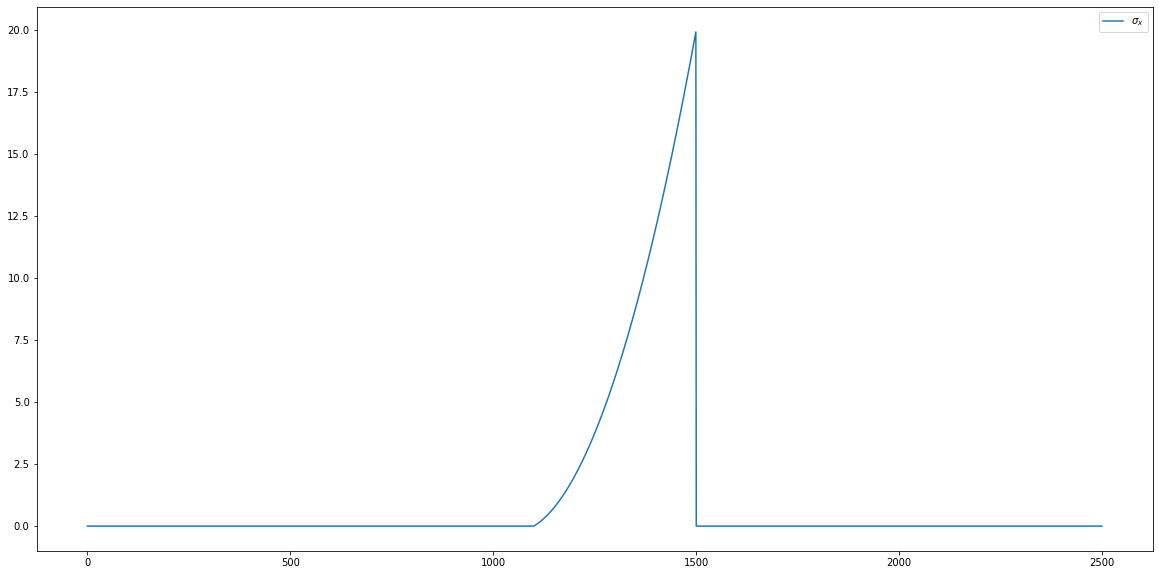

In [10]:
plt.figure(figsize=(20,10))
plt.plot(sigma_x,label='$\sigma_x$')
plt.legend()
plt.show()

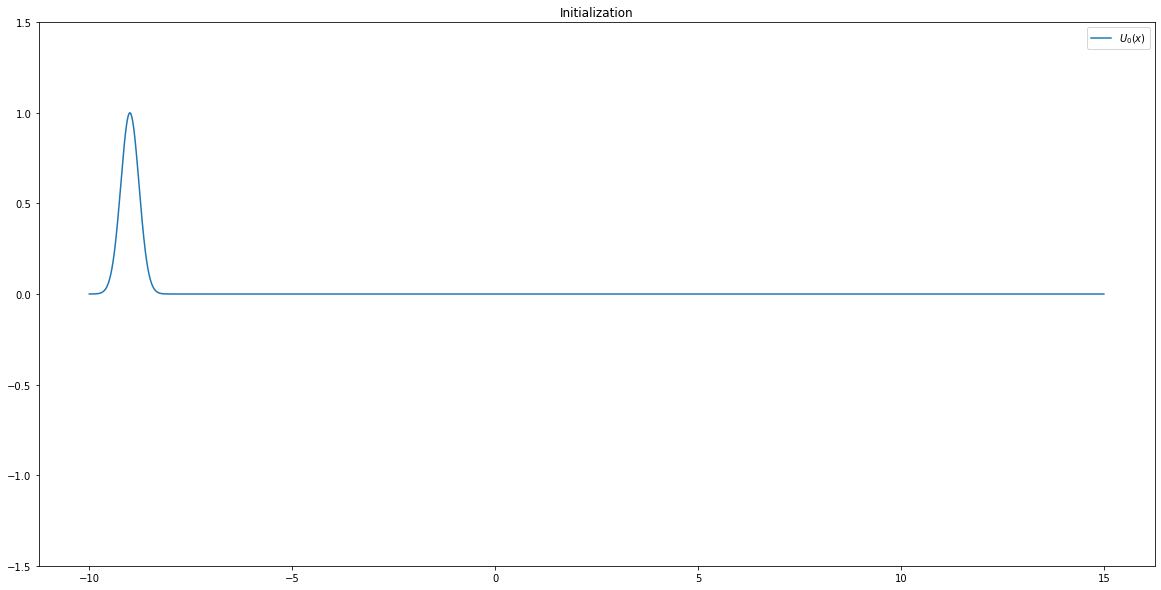

In [14]:
U0 = np.exp(-(x+9)**2/0.1)

plt.figure(figsize=(20,10))
plt.plot(x,U0,label='$U_{0}(x)$')
plt.title('Initialization')
plt.ylim(-1.5,1.5)
plt.legend()
plt.show()

In [15]:
U = np.zeros((nt,nx))
V = np.zeros((nt,nx))

U[0] = U0

In [27]:
# v0 = (U0[1:]-U0[:-1])/delta_t
# v0 = np.append([0],v1)


# v0 = np.arange(nx) * (np.arange(nx) - nx + 1) / nx ** 2
# v0 = np.zeros(nx)
V[0]    =  np.zeros(nx)

V[1,1:] = -(U[0,1:]-U[0,:-1])/delta_t
# V[1,1:] = 0
V[1,0]  = -U[0,0]/delta_t

In [28]:
U[1] = U0 + delta_t * V[1]

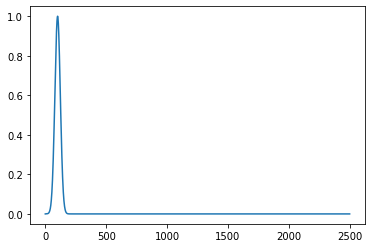

In [29]:
plt.plot(U[1])

In [30]:
for i in range(2,nt):
    
    U[i,1:-1] = -2*delta_t*(np.multiply(sigma_x[1:-1],U[i-1,1:-1]))-(delta_t/delta_x)*(V[i-1,2:]-V[i-1,:-2])+U[i-2,1:-1]
    
    V[i,1:-1] = -2*delta_t*(np.multiply(sigma_x[1:-1],V[i-1,1:-1]))-(delta_t/delta_x)*(U[i-1,2:]-U[i-1,:-2])+V[i-2,1:-1]
    
    
    U[i,0]  = 0
    U[i,-1] = 0
           
    
#     V[i,0]  = 0
#     V[i,-1] = 0
#     V[i,0]  = -(U[i,1]-U[i,0])/delta_t
#     V[i,-1] = -(U[i,-1]-U[i,-2])/delta_t                    
    
    

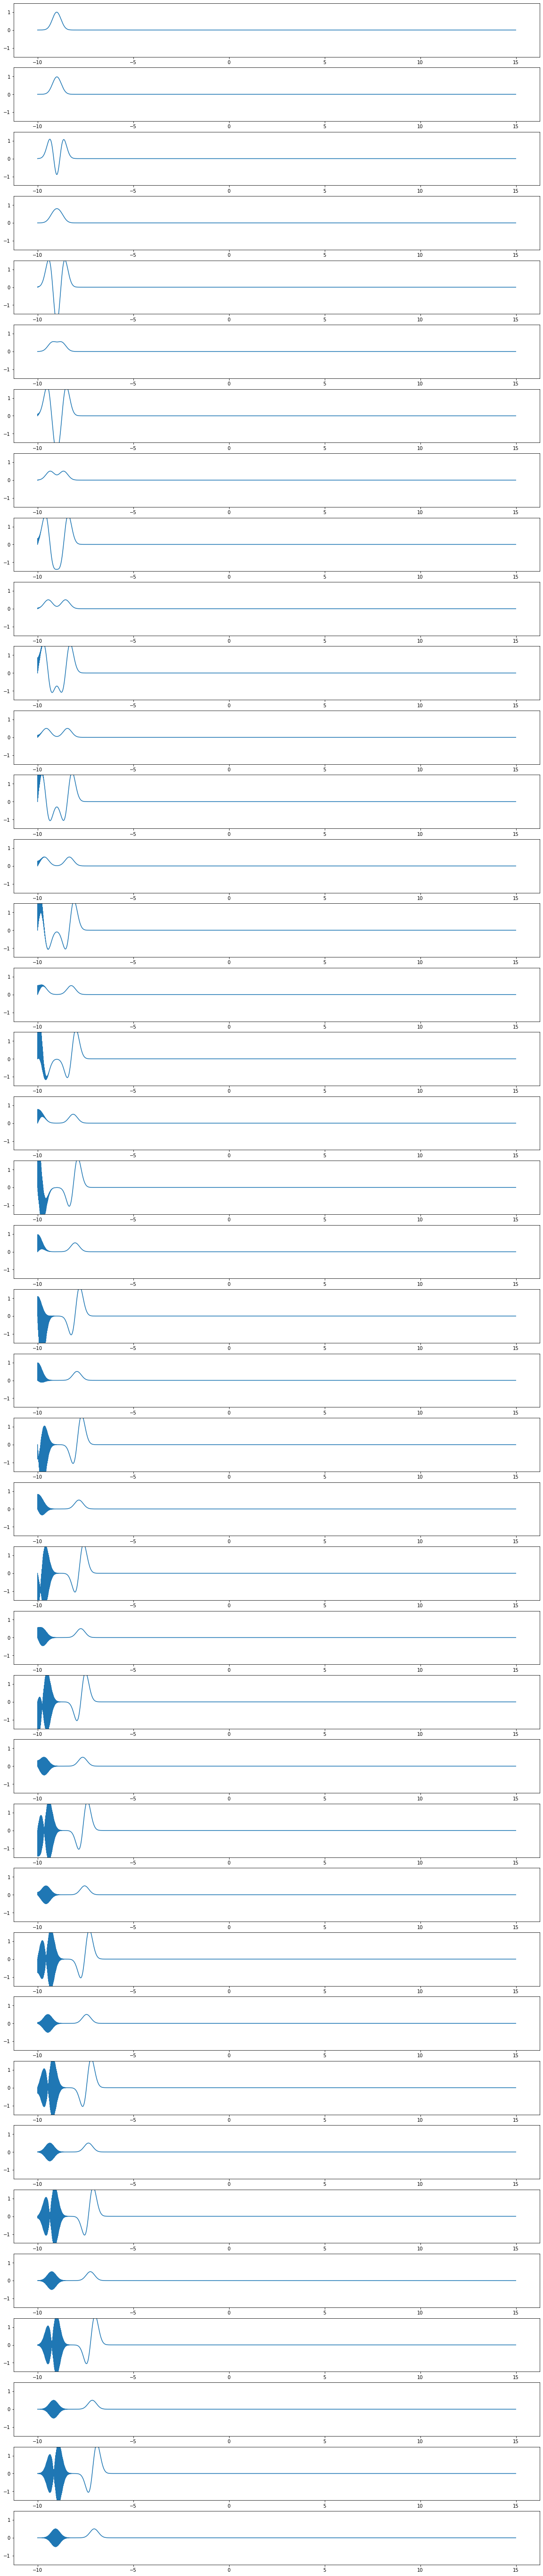

In [31]:
f,axes = plt.subplots(ncols=1,nrows=nt//5,figsize=(20,100))
for i in range(0,nt,5):
    ax = axes[int(i/5)]
    ax.set_ylim([-1.5, 1.5])
    ax.plot(x,U[i])
plt.show()

## PML 2D

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
delta_t = 0.01
delta_x = 0.01
#delta_y = delta_x
L = 5
end_L = 8
#epaisseur
delta = 1
alpha = 0.1
n     = 2
nt    = 100
x = np.arange(-end_L,end_L,delta_x)
y = np.arange(-end_L,end_L,delta_x)
nx= int(2*end_L/delta_x)
ny= int(2*end_L/delta_x)
W = np.zeros((nt,nx,ny))
XX,YY = np.meshgrid(x,y)
a = 2
b = 2
W[0,:,:] = np.exp(-((XX/a)**2 + (YY/b)**2)/0.1)/10
    

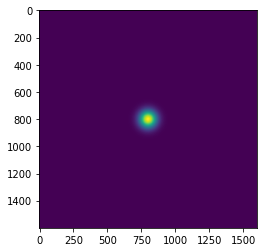

In [8]:
plt.imshow(W[0])
plt.show()